In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1fskPQKPc8scZ4I707Lc5b40hp08FK8lTRSZ-N6ZsE3c/edit#gid=311542150'
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
df = pd.read_csv(url_1)
df.head()

,Date,Quantity
0,01-04-2016,388
1,01-05-2016,293
2,01-06-2016,290
3,01-07-2016,402
4,01-08-2016,470


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      60 non-null     object
 1   Quantity  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%m-%Y")
# df['Date'] = df['Date'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      60 non-null     datetime64[ns]
 1   Quantity  60 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.1 KB


In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Quantity
Date,
2016-04-01,388
2016-05-01,293
2016-06-01,290
2016-07-01,402
2016-08-01,470


In [ ]:
df.shape

(60, 1)

<Axes: xlabel='Date'>

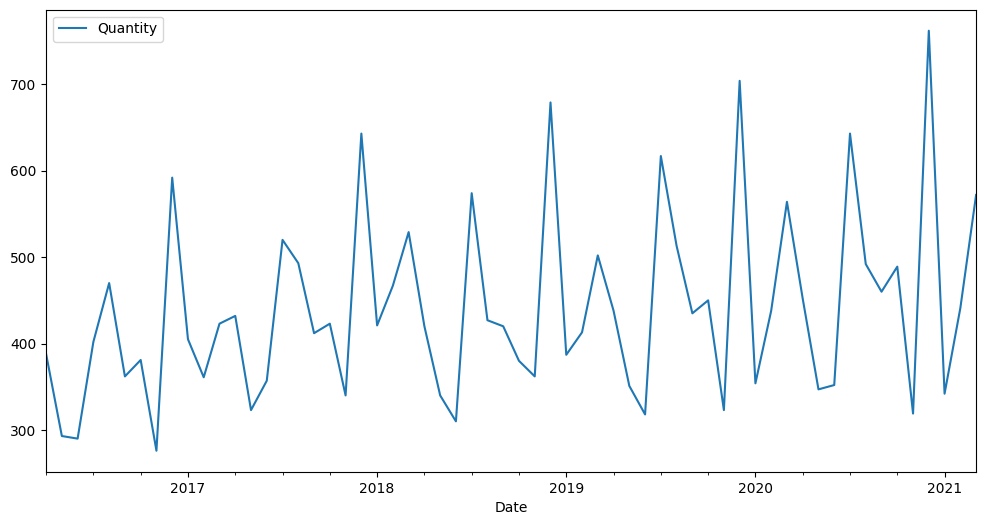

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
# train = df.iloc[:48]
train = df.copy()
# test = df.iloc[48:]

In [ ]:
train

,Quantity
Date,
2016-04-01,388
2016-05-01,293
2016-06-01,290
2016-07-01,402
2016-08-01,470
2016-09-01,362
2016-10-01,381
2016-11-01,276
2016-12-01,592


In [ ]:
train.shape

(60, 1)

In [ ]:
# test

In [ ]:
go = df.copy()
go.shape

(60, 1)

<Axes: xlabel='Date'>

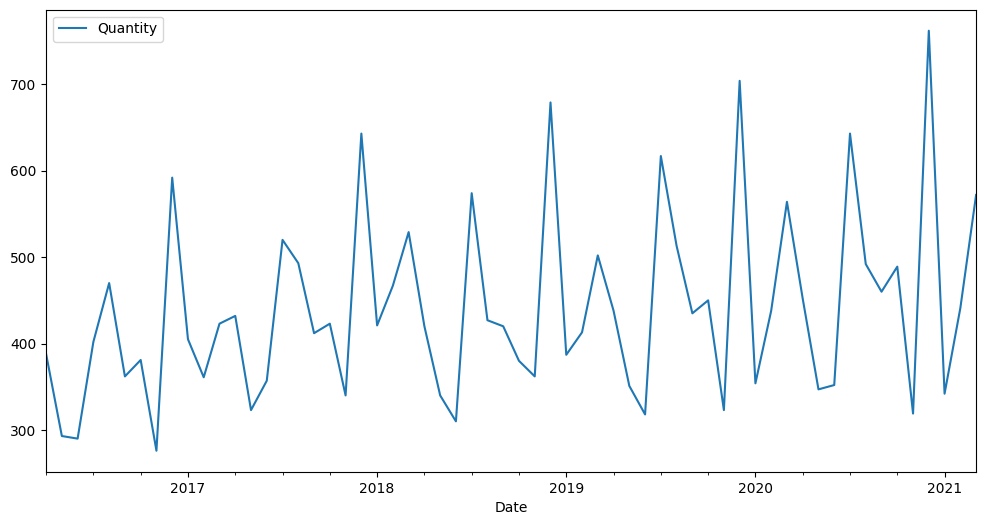

In [ ]:
go.plot(figsize=(12,6))

In [ ]:
go.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2016-04-01 to 2021-03-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Quantity  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# go.sort_index(inplace=True)

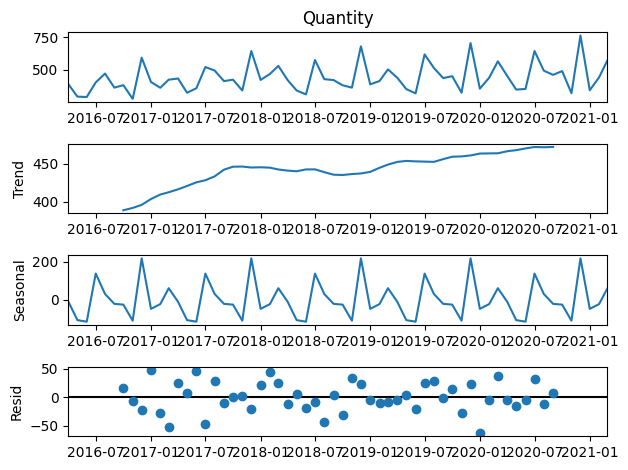

In [ ]:
results = seasonal_decompose(go['Quantity'])
results.plot();

In [ ]:
# go.head(48)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_features = 1

In [ ]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
48/48 [==============================] - 2s 6ms/step - loss: 0.0853
Epoch 2/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0568
Epoch 3/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0531
Epoch 4/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0534
Epoch 5/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0553
Epoch 6/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0532
Epoch 7/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0533
Epoch 8/50
48/48 [==============================] - 0s 5ms/step - loss: 0.0535
Epoch 9/50
48/48 [==============================] - 0s 6ms/step - loss: 0.0534
Epoch 10/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0512
Epoch 11/50
48/48 [==============================] - 0s 9ms/step - loss: 0.0520
Epoch 12/50
48/48 [==============================] - 1s 16ms/step - loss: 0.0491
Epoch 13/50
48/48 [=============================

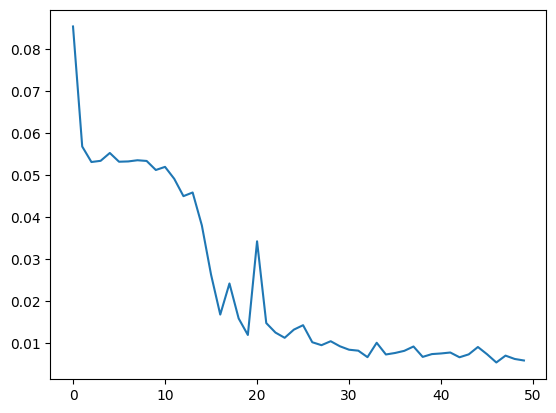

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 193ms/step


array([[0.3347244]], dtype=float32)

In [ ]:
# scaled_test[0]

array([0.41121495])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(12):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
test_predictions

[array([0.3347244], dtype=float32),
 array([0.0986667], dtype=float32),
 array([0.10896993], dtype=float32),
 array([0.82677406], dtype=float32),
 array([0.39572293], dtype=float32),
 array([0.35773417], dtype=float32),
 array([0.42807207], dtype=float32),
 array([0.09352468], dtype=float32),
 array([1.1275575], dtype=float32),
 array([0.07000288], dtype=float32),
 array([0.3318178], dtype=float32),
 array([0.5964774], dtype=float32)]

In [ ]:
# test.head()

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[438.67605668],
       [323.9520151 ],
       [328.95938806],
       [677.81219351],
       [468.32134187],
       [449.85880834],
       [484.04302365],
       [321.45299426],
       [823.99295282],
       [310.02140146],
       [437.2634536 ],
       [565.88801122]])

In [ ]:
# test['Predictions'] = true_predictions
# pred = pd.Series(true_predictions)
# frame = {'Predictions': pred}
# test = pd.DataFrame(frame)
df_op = pd.DataFrame(true_predictions, columns=['Predictions'])
df_op
# test = pd.DataFrame(columns = ['Predictions'])
# test['Predictions'] = true_predictions

,Predictions
0,438.676057
1,323.952015
2,328.959388
3,677.812194
4,468.321342
5,449.858808
6,484.043024
7,321.452994
8,823.992953
9,310.021401


In [ ]:
df_op['Predictions'] = df_op['Predictions'] - 0.05*df_op['Predictions']
df_op

,Predictions
0,416.742254
1,307.754414
2,312.511419
3,643.921584
4,444.905275
5,427.365868
6,459.840872
7,305.380345
8,782.793305
9,294.520331


<Axes: >

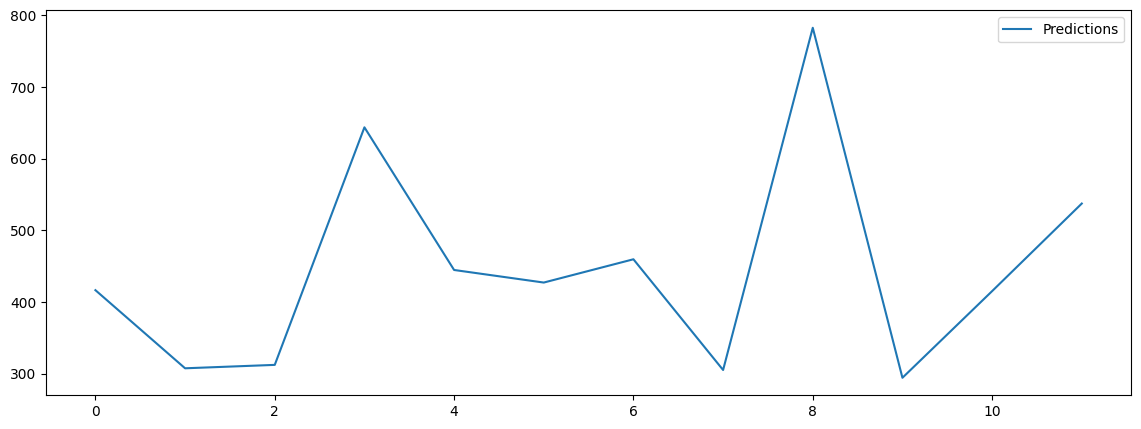

In [ ]:
df_op.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Quantity'],test['Predictions']))
print(rmse)

40.56219994840422


In [ ]:
test.shape

(12, 2)

In [ ]:
test

,Quantity,Predictions
Date,,
2020-04-01,452,457.920707
2020-05-01,347,390.840817
2020-06-01,352,385.975731
2020-07-01,643,691.899213
2020-08-01,492,524.330888
2020-09-01,460,457.423808
2020-10-01,489,479.305954
2020-11-01,319,401.458331
2020-12-01,762,789.786249
